## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 58.2ms	remaining: 58.2s
1:	learn: 0.9606716	total: 59.4ms	remaining: 29.6s
2:	learn: 0.9390920	total: 60.5ms	remaining: 20.1s
3:	learn: 0.9209237	total: 61.7ms	remaining: 15.4s
4:	learn: 0.9046978	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8896854	total: 64.1ms	remaining: 10.6s
6:	learn: 0.8724151	total: 65.1ms	remaining: 9.23s
7:	learn: 0.8558633	total: 66.1ms	remaining: 8.2s
8:	learn: 0.8400199	total: 67.2ms	remaining: 7.4s
9:	learn: 0.8229065	total: 68.1ms	remaining: 6.74s
10:	learn: 0.8057776	total: 69ms	remaining: 6.21s
11:	learn: 0.7907426	total: 70ms	remaining: 5.76s
12:	learn: 0.7753485	total: 70.8ms	remaining: 5.38s
13:	learn: 0.7601130	total: 71.7ms	remaining: 5.05s
14:	learn: 0.7475256	total: 72.7ms	remaining: 4.77s
15:	learn: 0.7326054	total: 73.6ms	remaining: 4.53s
16:	learn: 0.7206853	total: 74.5ms	remaining: 4.31s
17:	learn: 0.7077303	total: 75.3ms	remaining: 4.11s
18:	learn: 0.6955287	total: 76.3ms	remaining: 3.94

98:	learn: 0.3101878	total: 151ms	remaining: 1.37s
99:	learn: 0.3091652	total: 152ms	remaining: 1.37s
100:	learn: 0.3073446	total: 153ms	remaining: 1.36s
101:	learn: 0.3059717	total: 154ms	remaining: 1.36s
102:	learn: 0.3044976	total: 155ms	remaining: 1.35s
103:	learn: 0.3030824	total: 156ms	remaining: 1.34s
104:	learn: 0.3013455	total: 157ms	remaining: 1.34s
105:	learn: 0.2996238	total: 158ms	remaining: 1.33s
106:	learn: 0.2980370	total: 159ms	remaining: 1.32s
107:	learn: 0.2965967	total: 160ms	remaining: 1.32s
108:	learn: 0.2951864	total: 161ms	remaining: 1.31s
109:	learn: 0.2942861	total: 162ms	remaining: 1.31s
110:	learn: 0.2932928	total: 163ms	remaining: 1.3s
111:	learn: 0.2916150	total: 163ms	remaining: 1.3s
112:	learn: 0.2903158	total: 164ms	remaining: 1.29s
113:	learn: 0.2893044	total: 165ms	remaining: 1.28s
114:	learn: 0.2880453	total: 166ms	remaining: 1.28s
115:	learn: 0.2868924	total: 167ms	remaining: 1.27s
116:	learn: 0.2854905	total: 168ms	remaining: 1.27s
117:	learn: 0.28

142:	learn: 0.2604558	total: 193ms	remaining: 1.16s
143:	learn: 0.2590422	total: 195ms	remaining: 1.16s
144:	learn: 0.2583398	total: 196ms	remaining: 1.16s
145:	learn: 0.2574131	total: 197ms	remaining: 1.15s
146:	learn: 0.2561256	total: 198ms	remaining: 1.15s
147:	learn: 0.2550767	total: 199ms	remaining: 1.15s
148:	learn: 0.2541599	total: 200ms	remaining: 1.14s
149:	learn: 0.2534840	total: 201ms	remaining: 1.14s
150:	learn: 0.2527124	total: 202ms	remaining: 1.14s
151:	learn: 0.2520669	total: 203ms	remaining: 1.13s
152:	learn: 0.2511829	total: 204ms	remaining: 1.13s
153:	learn: 0.2507161	total: 205ms	remaining: 1.13s
154:	learn: 0.2497802	total: 206ms	remaining: 1.12s
155:	learn: 0.2490613	total: 207ms	remaining: 1.12s
156:	learn: 0.2484356	total: 208ms	remaining: 1.12s
157:	learn: 0.2475208	total: 209ms	remaining: 1.11s
158:	learn: 0.2467460	total: 210ms	remaining: 1.11s
159:	learn: 0.2461317	total: 211ms	remaining: 1.11s
160:	learn: 0.2456028	total: 212ms	remaining: 1.1s
161:	learn: 0

296:	learn: 0.1788226	total: 342ms	remaining: 809ms
297:	learn: 0.1784691	total: 343ms	remaining: 808ms
298:	learn: 0.1781306	total: 344ms	remaining: 806ms
299:	learn: 0.1778034	total: 345ms	remaining: 805ms
300:	learn: 0.1773609	total: 346ms	remaining: 803ms
301:	learn: 0.1771097	total: 347ms	remaining: 801ms
302:	learn: 0.1766351	total: 348ms	remaining: 800ms
303:	learn: 0.1762749	total: 349ms	remaining: 798ms
304:	learn: 0.1758184	total: 350ms	remaining: 796ms
305:	learn: 0.1755761	total: 350ms	remaining: 795ms
306:	learn: 0.1752450	total: 351ms	remaining: 793ms
307:	learn: 0.1748989	total: 352ms	remaining: 792ms
308:	learn: 0.1745082	total: 353ms	remaining: 790ms
309:	learn: 0.1740813	total: 354ms	remaining: 788ms
310:	learn: 0.1738419	total: 355ms	remaining: 787ms
311:	learn: 0.1734089	total: 356ms	remaining: 785ms
312:	learn: 0.1731178	total: 357ms	remaining: 783ms
313:	learn: 0.1727077	total: 358ms	remaining: 782ms
314:	learn: 0.1723778	total: 359ms	remaining: 780ms
315:	learn: 

342:	learn: 0.1637969	total: 385ms	remaining: 737ms
343:	learn: 0.1634989	total: 386ms	remaining: 735ms
344:	learn: 0.1631288	total: 387ms	remaining: 734ms
345:	learn: 0.1630031	total: 387ms	remaining: 732ms
346:	learn: 0.1625470	total: 388ms	remaining: 731ms
347:	learn: 0.1622545	total: 389ms	remaining: 729ms
348:	learn: 0.1619905	total: 390ms	remaining: 728ms
349:	learn: 0.1619095	total: 391ms	remaining: 727ms
350:	learn: 0.1616910	total: 392ms	remaining: 725ms
351:	learn: 0.1613933	total: 393ms	remaining: 724ms
352:	learn: 0.1611181	total: 394ms	remaining: 722ms
353:	learn: 0.1607851	total: 395ms	remaining: 721ms
354:	learn: 0.1604549	total: 396ms	remaining: 719ms
355:	learn: 0.1601748	total: 397ms	remaining: 718ms
356:	learn: 0.1600802	total: 398ms	remaining: 716ms
357:	learn: 0.1598210	total: 399ms	remaining: 715ms
358:	learn: 0.1595903	total: 400ms	remaining: 714ms
359:	learn: 0.1593606	total: 401ms	remaining: 712ms
360:	learn: 0.1590600	total: 402ms	remaining: 711ms
361:	learn: 

497:	learn: 0.1285331	total: 534ms	remaining: 538ms
498:	learn: 0.1281784	total: 535ms	remaining: 537ms
499:	learn: 0.1280343	total: 536ms	remaining: 536ms
500:	learn: 0.1278285	total: 537ms	remaining: 535ms
501:	learn: 0.1275819	total: 538ms	remaining: 534ms
502:	learn: 0.1274923	total: 539ms	remaining: 532ms
503:	learn: 0.1273702	total: 540ms	remaining: 531ms
504:	learn: 0.1272349	total: 541ms	remaining: 530ms
505:	learn: 0.1271260	total: 542ms	remaining: 529ms
506:	learn: 0.1270468	total: 543ms	remaining: 528ms
507:	learn: 0.1268447	total: 544ms	remaining: 526ms
508:	learn: 0.1266565	total: 544ms	remaining: 525ms
509:	learn: 0.1265379	total: 545ms	remaining: 524ms
510:	learn: 0.1264936	total: 546ms	remaining: 523ms
511:	learn: 0.1263041	total: 547ms	remaining: 522ms
512:	learn: 0.1260636	total: 548ms	remaining: 520ms
513:	learn: 0.1257801	total: 549ms	remaining: 519ms
514:	learn: 0.1254765	total: 550ms	remaining: 518ms
515:	learn: 0.1254352	total: 551ms	remaining: 517ms
516:	learn: 

542:	learn: 0.1212860	total: 577ms	remaining: 485ms
543:	learn: 0.1211131	total: 578ms	remaining: 484ms
544:	learn: 0.1208536	total: 579ms	remaining: 483ms
545:	learn: 0.1207734	total: 580ms	remaining: 482ms
546:	learn: 0.1205887	total: 581ms	remaining: 481ms
547:	learn: 0.1203470	total: 582ms	remaining: 480ms
548:	learn: 0.1201638	total: 583ms	remaining: 479ms
549:	learn: 0.1200067	total: 584ms	remaining: 478ms
550:	learn: 0.1198272	total: 585ms	remaining: 477ms
551:	learn: 0.1195666	total: 586ms	remaining: 476ms
552:	learn: 0.1194183	total: 587ms	remaining: 474ms
553:	learn: 0.1191881	total: 588ms	remaining: 473ms
554:	learn: 0.1189026	total: 589ms	remaining: 472ms
555:	learn: 0.1187021	total: 590ms	remaining: 471ms
556:	learn: 0.1185118	total: 590ms	remaining: 470ms
557:	learn: 0.1183468	total: 591ms	remaining: 468ms
558:	learn: 0.1181768	total: 592ms	remaining: 467ms
559:	learn: 0.1179853	total: 593ms	remaining: 466ms
560:	learn: 0.1177859	total: 594ms	remaining: 465ms
561:	learn: 

699:	learn: 0.0973531	total: 726ms	remaining: 311ms
700:	learn: 0.0972431	total: 727ms	remaining: 310ms
701:	learn: 0.0970350	total: 728ms	remaining: 309ms
702:	learn: 0.0969911	total: 729ms	remaining: 308ms
703:	learn: 0.0969461	total: 730ms	remaining: 307ms
704:	learn: 0.0968824	total: 731ms	remaining: 306ms
705:	learn: 0.0967427	total: 732ms	remaining: 305ms
706:	learn: 0.0966381	total: 733ms	remaining: 304ms
707:	learn: 0.0966189	total: 734ms	remaining: 303ms
708:	learn: 0.0965242	total: 734ms	remaining: 301ms
709:	learn: 0.0964063	total: 735ms	remaining: 300ms
710:	learn: 0.0961943	total: 736ms	remaining: 299ms
711:	learn: 0.0960212	total: 737ms	remaining: 298ms
712:	learn: 0.0958473	total: 738ms	remaining: 297ms
713:	learn: 0.0957051	total: 739ms	remaining: 296ms
714:	learn: 0.0955957	total: 740ms	remaining: 295ms
715:	learn: 0.0954229	total: 741ms	remaining: 294ms
716:	learn: 0.0953297	total: 742ms	remaining: 293ms
717:	learn: 0.0952661	total: 743ms	remaining: 292ms
718:	learn: 

745:	learn: 0.0918709	total: 769ms	remaining: 262ms
746:	learn: 0.0917286	total: 770ms	remaining: 261ms
747:	learn: 0.0916813	total: 771ms	remaining: 260ms
748:	learn: 0.0915730	total: 772ms	remaining: 259ms
749:	learn: 0.0915436	total: 773ms	remaining: 258ms
750:	learn: 0.0914450	total: 774ms	remaining: 257ms
751:	learn: 0.0912826	total: 775ms	remaining: 256ms
752:	learn: 0.0911103	total: 776ms	remaining: 254ms
753:	learn: 0.0909450	total: 777ms	remaining: 253ms
754:	learn: 0.0908138	total: 778ms	remaining: 252ms
755:	learn: 0.0907134	total: 779ms	remaining: 251ms
756:	learn: 0.0906398	total: 780ms	remaining: 250ms
757:	learn: 0.0905546	total: 781ms	remaining: 249ms
758:	learn: 0.0904137	total: 782ms	remaining: 248ms
759:	learn: 0.0903441	total: 783ms	remaining: 247ms
760:	learn: 0.0902583	total: 784ms	remaining: 246ms
761:	learn: 0.0901566	total: 785ms	remaining: 245ms
762:	learn: 0.0900882	total: 786ms	remaining: 244ms
763:	learn: 0.0899894	total: 787ms	remaining: 243ms
764:	learn: 

901:	learn: 0.0765289	total: 918ms	remaining: 99.7ms
902:	learn: 0.0764690	total: 919ms	remaining: 98.7ms
903:	learn: 0.0763226	total: 920ms	remaining: 97.7ms
904:	learn: 0.0762425	total: 921ms	remaining: 96.7ms
905:	learn: 0.0761494	total: 922ms	remaining: 95.7ms
906:	learn: 0.0760610	total: 923ms	remaining: 94.6ms
907:	learn: 0.0760024	total: 924ms	remaining: 93.6ms
908:	learn: 0.0759044	total: 925ms	remaining: 92.6ms
909:	learn: 0.0758260	total: 926ms	remaining: 91.5ms
910:	learn: 0.0757466	total: 927ms	remaining: 90.5ms
911:	learn: 0.0756545	total: 928ms	remaining: 89.5ms
912:	learn: 0.0755761	total: 928ms	remaining: 88.5ms
913:	learn: 0.0754685	total: 929ms	remaining: 87.5ms
914:	learn: 0.0753754	total: 930ms	remaining: 86.4ms
915:	learn: 0.0752357	total: 931ms	remaining: 85.4ms
916:	learn: 0.0751262	total: 932ms	remaining: 84.4ms
917:	learn: 0.0750420	total: 933ms	remaining: 83.3ms
918:	learn: 0.0749671	total: 934ms	remaining: 82.3ms
919:	learn: 0.0749564	total: 935ms	remaining: 

946:	learn: 0.0726765	total: 961ms	remaining: 53.8ms
947:	learn: 0.0726307	total: 962ms	remaining: 52.8ms
948:	learn: 0.0725315	total: 963ms	remaining: 51.8ms
949:	learn: 0.0724728	total: 964ms	remaining: 50.7ms
950:	learn: 0.0723660	total: 965ms	remaining: 49.7ms
951:	learn: 0.0722875	total: 966ms	remaining: 48.7ms
952:	learn: 0.0721778	total: 967ms	remaining: 47.7ms
953:	learn: 0.0721051	total: 968ms	remaining: 46.7ms
954:	learn: 0.0719889	total: 969ms	remaining: 45.6ms
955:	learn: 0.0719137	total: 970ms	remaining: 44.6ms
956:	learn: 0.0718347	total: 970ms	remaining: 43.6ms
957:	learn: 0.0717643	total: 971ms	remaining: 42.6ms
958:	learn: 0.0716632	total: 972ms	remaining: 41.6ms
959:	learn: 0.0716285	total: 973ms	remaining: 40.6ms
960:	learn: 0.0716086	total: 974ms	remaining: 39.5ms
961:	learn: 0.0715439	total: 975ms	remaining: 38.5ms
962:	learn: 0.0714557	total: 976ms	remaining: 37.5ms
963:	learn: 0.0713766	total: 977ms	remaining: 36.5ms
964:	learn: 0.0713120	total: 978ms	remaining: 

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.18665146854733144


#### Sanity Checks 

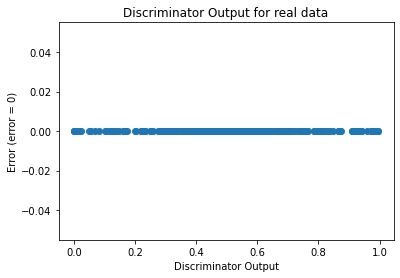

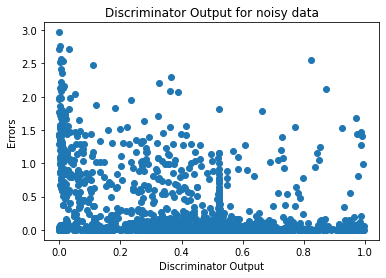

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 5000


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.1787194193657679


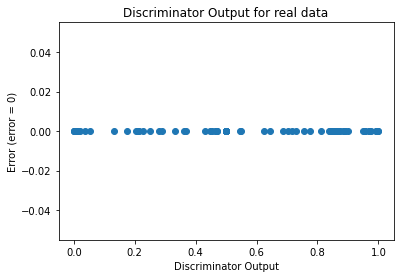

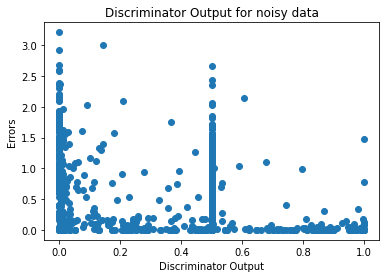

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1526814137571397


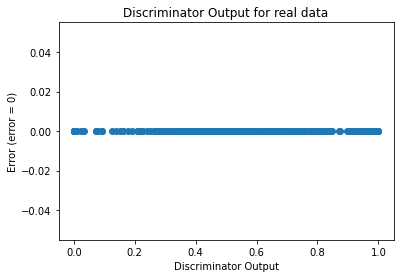

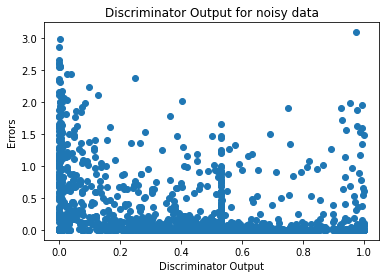

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9273]], requires_grad=True)
